### Checking Chrome Driver

In [1]:
## installing Chrome Driver
from webdriver_manager.chrome import ChromeDriverManager
ChromeDriverManager().install();

## Importing Universal Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

## Reading Dataset

In [3]:
df = pd.read_csv('data/task2.csv')

## Showing Information around the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


## Cleansing Dataset of Duplicates and NANs

In [5]:
cleansed_df = df.drop_duplicates()
cleansed_df = cleansed_df.dropna()

In [6]:
cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8407 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 591.1+ KB


## Extracting All Currencies in the Dataset

In [7]:
value_counts = cleansed_df.groupby('Salary_Currency').size()
value_counts = value_counts.reset_index()
value_counts.columns = ['Salary_Currency', 'Count']
value_counts

,Salary_Currency,Count
0,AUD,12
1,BRL,4
2,CAD,48
3,CHF,6
4,CLP,1
5,DKK,3
6,EUR,339
7,GBP,410
8,HKD,1
9,HUF,3


## Dropping Entries with Minor Currencies

In [8]:
filter_indexes = cleansed_df['Salary_Currency'].isin(value_counts[value_counts['Count'] >= 10]['Salary_Currency'])
filtered_df = cleansed_df[filter_indexes]
filtered_df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


In [9]:
filtered_df['Salary_Currency'].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64

## Adding a Column to the Dataset Regarding Salaries in USD

In [10]:
from task2.currency import find_exchange_rate

exchange_rates = {}
for currency in filtered_df['Salary_Currency'].unique():
    exchange_rates[currency] = find_exchange_rate(currency)

In [11]:
exchange_rates

{'USD': 1, 'EUR': 1.08, 'GBP': 1.26, 'CAD': 0.74, 'AUD': 0.66, 'INR': 0.012}

In [12]:
filtered_df.loc[:, "Salary_in_USD"] = filtered_df.apply(
    lambda entry: exchange_rates[entry['Salary_Currency']] * entry['Salary'],
    axis=1)
filtered_df[filtered_df['Salary_Currency'] != 'USD']

/tmp/ipykernel_84100/3129414503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Salary_in_USD"] = filtered_df.apply(


,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_in_USD
29,2024,Entry-Level,Full-Time,Data Analyst,39600,EUR,0,Medium,42768.00
30,2024,Entry-Level,Full-Time,Data Analyst,33600,EUR,0,Medium,36288.00
143,2024,Senior-Level,Full-Time,Data Quality Analyst,80000,GBP,0,Medium,100800.00
144,2024,Senior-Level,Full-Time,Data Quality Analyst,45000,GBP,0,Medium,56700.00
243,2023,Entry-Level,Full-Time,Data DevOps Engineer,44382,EUR,50,Large,47932.56
...,...,...,...,...,...,...,...,...,...
13952,2021,Mid-Level,Full-Time,Lead Data Analyst,1450000,INR,100,Large,17400.00
13956,2021,Mid-Level,Full-Time,Data Engineer,38400,EUR,100,Large,41472.00
13961,2020,Senior-Level,Full-Time,Machine Learning Engineer,40000,EUR,100,S,43200.00
13965,2021,Mid-Level,Full-Time,Data Engineer,24000,EUR,50,Large,25920.00


## Visualizations

In [13]:
from task2.plot import *

In [14]:
finalized_df = filtered_df
n_bins = 20
n_cols = 4

### Histogram of All Salaries

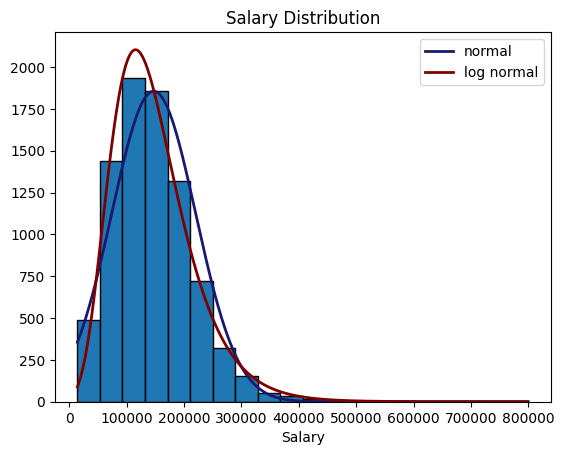

In [15]:
data = finalized_df['Salary_in_USD']
xmin, xmax = data.min(), data.max()
plt.figure()
plt.hist(data, bins=n_bins, edgecolor='black')
plot_fitted_normal(data, n_bins)
plot_fitted_lognormal(data, n_bins)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.grid(False)
plt.legend()
plt.show()

### Violin Plot of All Salaries

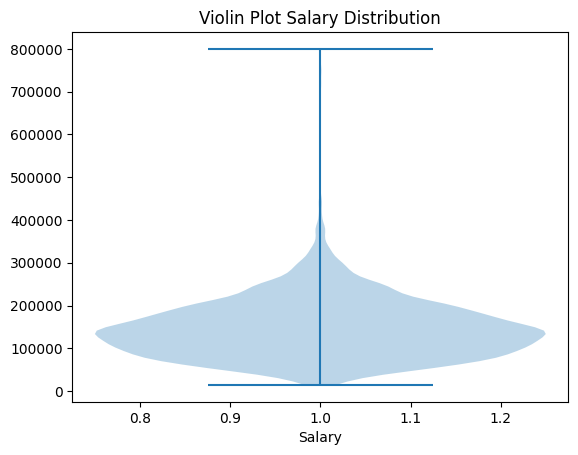

In [16]:
plt.figure()
plt.violinplot(finalized_df['Salary_in_USD'])
plt.title('Violin Plot Salary Distribution')
plt.xlabel('Salary')
plt.grid(False)
plt.show()

### 10 Most Popular Job Titles

10 most popular job titles are listed below.

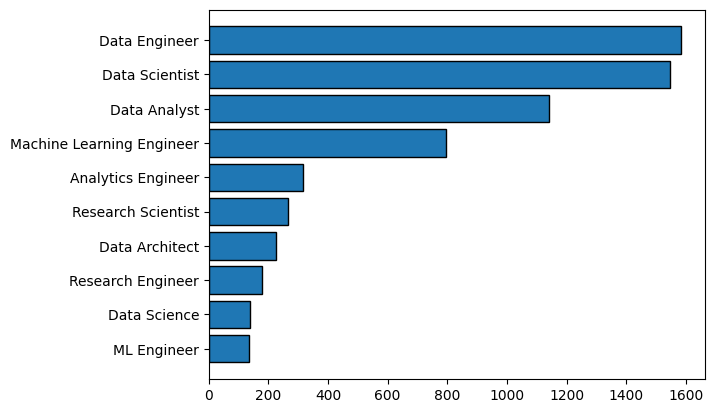

In [17]:
data = finalized_df['Job_Title'].value_counts().sort_values(ascending=False)[:10]
data = data[::-1]
plt.barh(data.index, data, edgecolor='black')
plt.show()

### Top 10 Highest Salaries
Top ten highest salaries and the entry corresponding to them are listed below.

In [18]:
finalized_df.sort_values(ascending=False, by='Salary_in_USD')[:10]

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_in_USD
242,2024,Mid-Level,Full-Time,AI Architect,800000,USD,100,Medium,800000.0
1085,2024,Entry-Level,Full-Time,Data Analyst,774000,USD,0,Medium,774000.0
2060,2024,Mid-Level,Full-Time,Machine Learning Scientist,750000,USD,0,Medium,750000.0
2471,2024,Senior-Level,Full-Time,Data Analyst,750000,USD,0,Medium,750000.0
4828,2023,Mid-Level,Full-Time,Data Engineer,750000,USD,0,Medium,750000.0
3850,2023,Mid-Level,Full-Time,Machine Learning Engineer,750000,USD,0,Medium,750000.0
1884,2024,Senior-Level,Full-Time,Analytics Engineer,750000,USD,0,Medium,750000.0
4936,2023,Senior-Level,Full-Time,Data Scientist,750000,USD,0,Medium,750000.0
3844,2023,Mid-Level,Full-Time,Machine Learning Scientist,750000,USD,0,Medium,750000.0
3276,2024,Mid-Level,Full-Time,Research Engineer,720000,USD,0,Medium,720000.0


### Analysis of Experience Level

#### Histograms

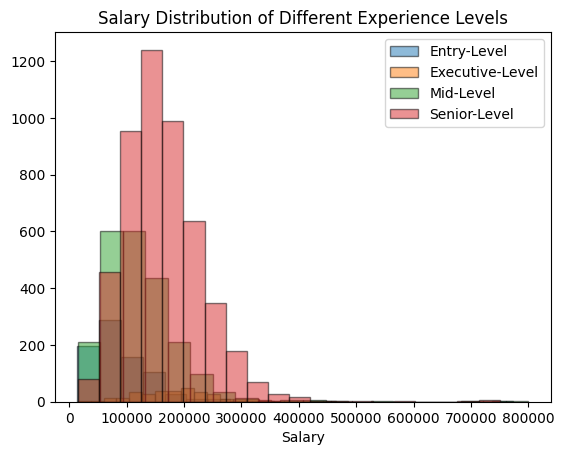

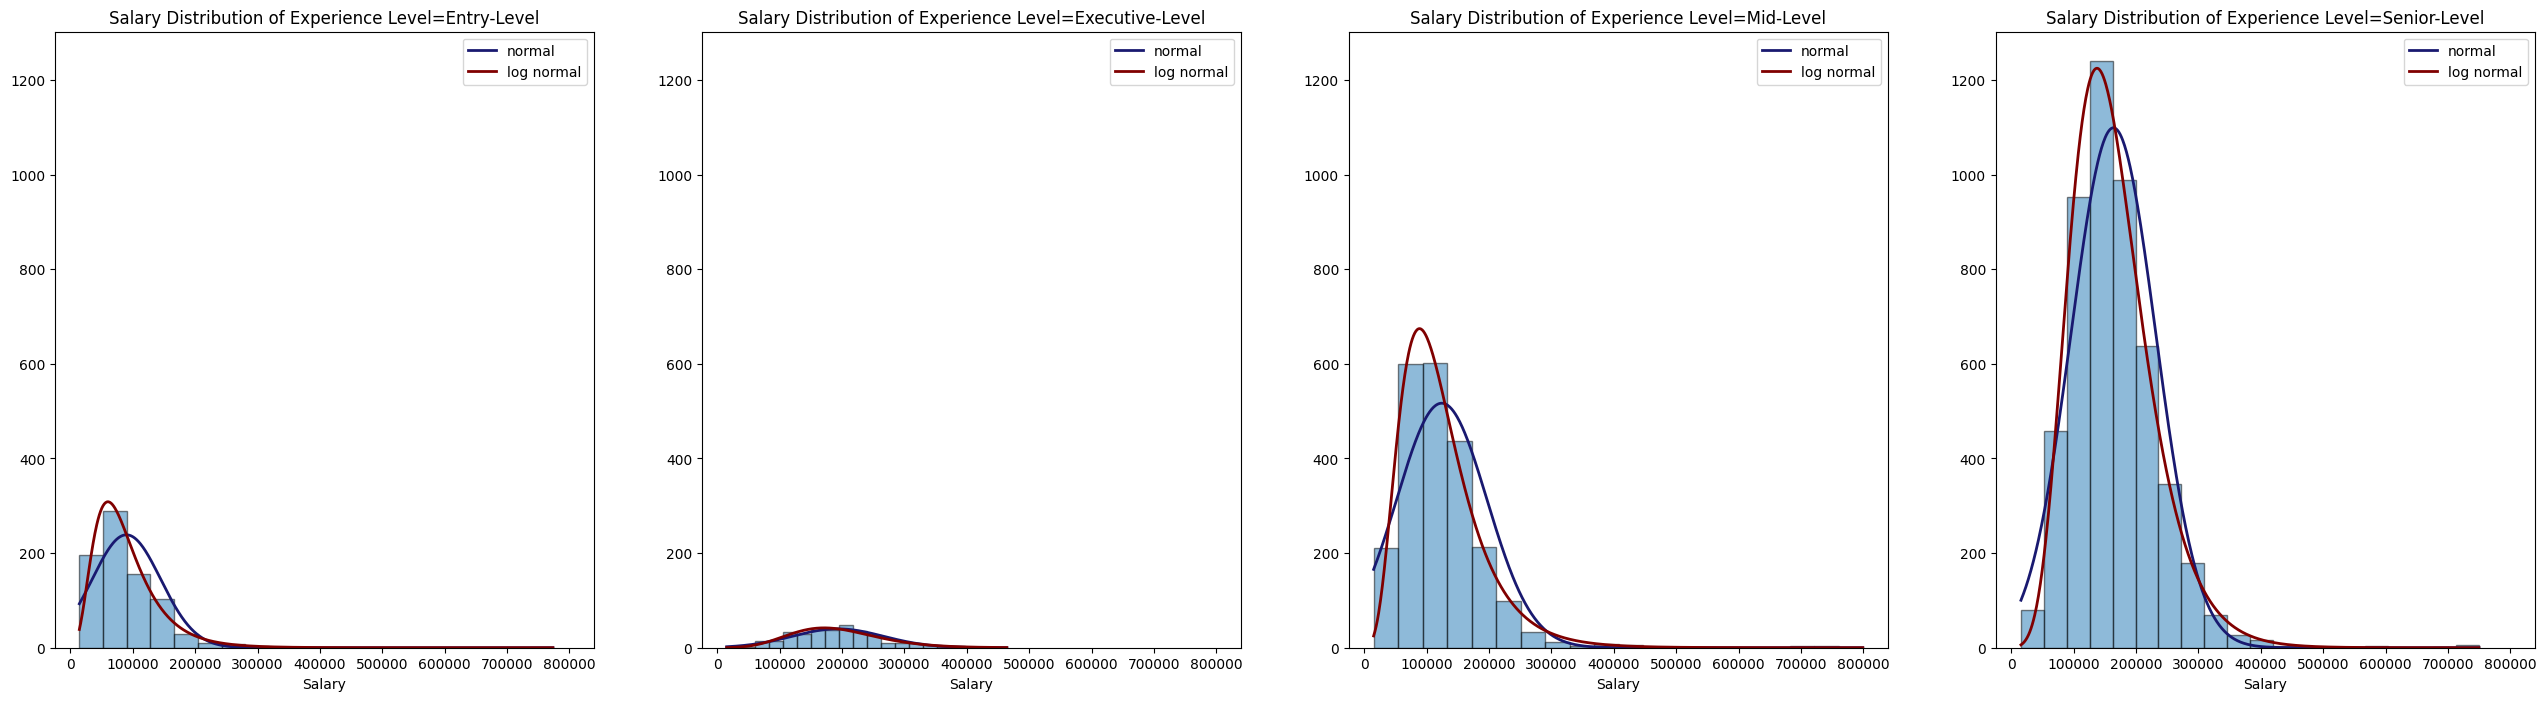

In [19]:
do_histograms(finalized_df, grouping_column='Experience_Level', n_bins=n_bins, n_cols=n_cols)

#### Violin Plots

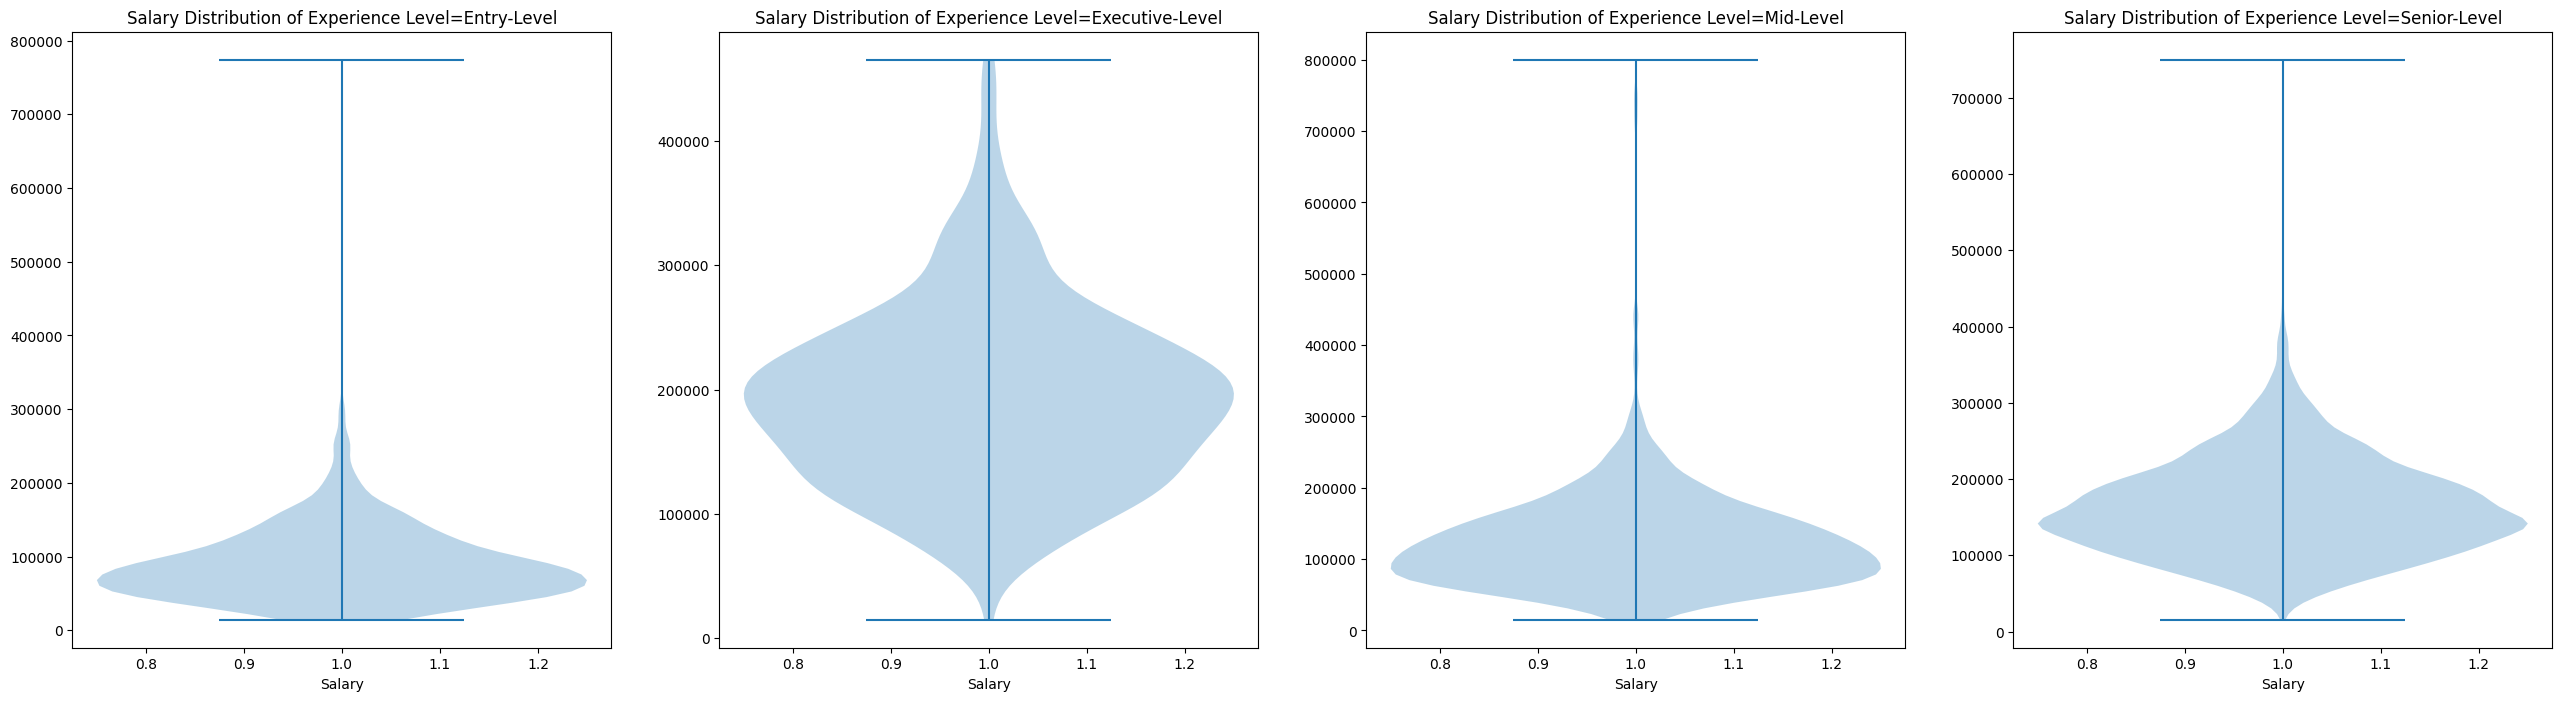

In [20]:
do_violin_plots(finalized_df, grouping_column='Experience_Level', n_cols=n_cols)

#### Quantile Plot

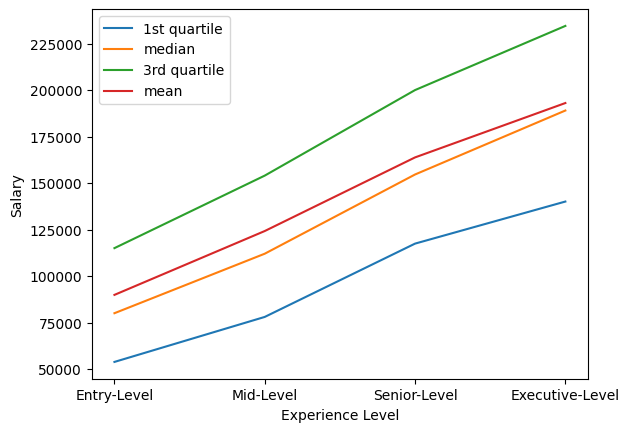

In [22]:
do_quantile_plot(finalized_df, grouping_column='Experience_Level', ordered_values=np.array(['Entry-Level',
                                                                                            'Mid-Level',
                                                                                            'Senior-Level',
                                                                                            'Executive-Level']))

Based on the plots, the level of experience has almost a linear impact on the salary.

### Analysis of Different Work Years 

#### Histograms

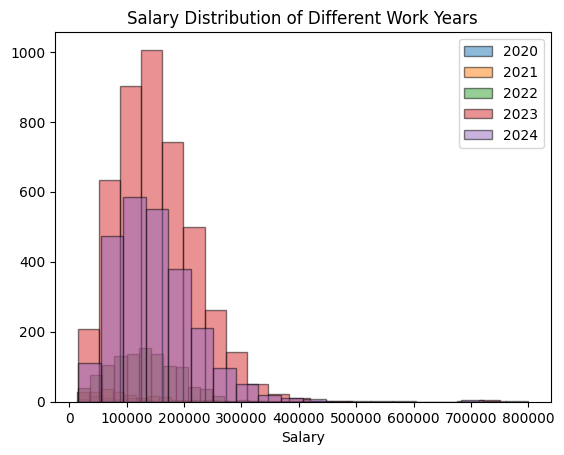

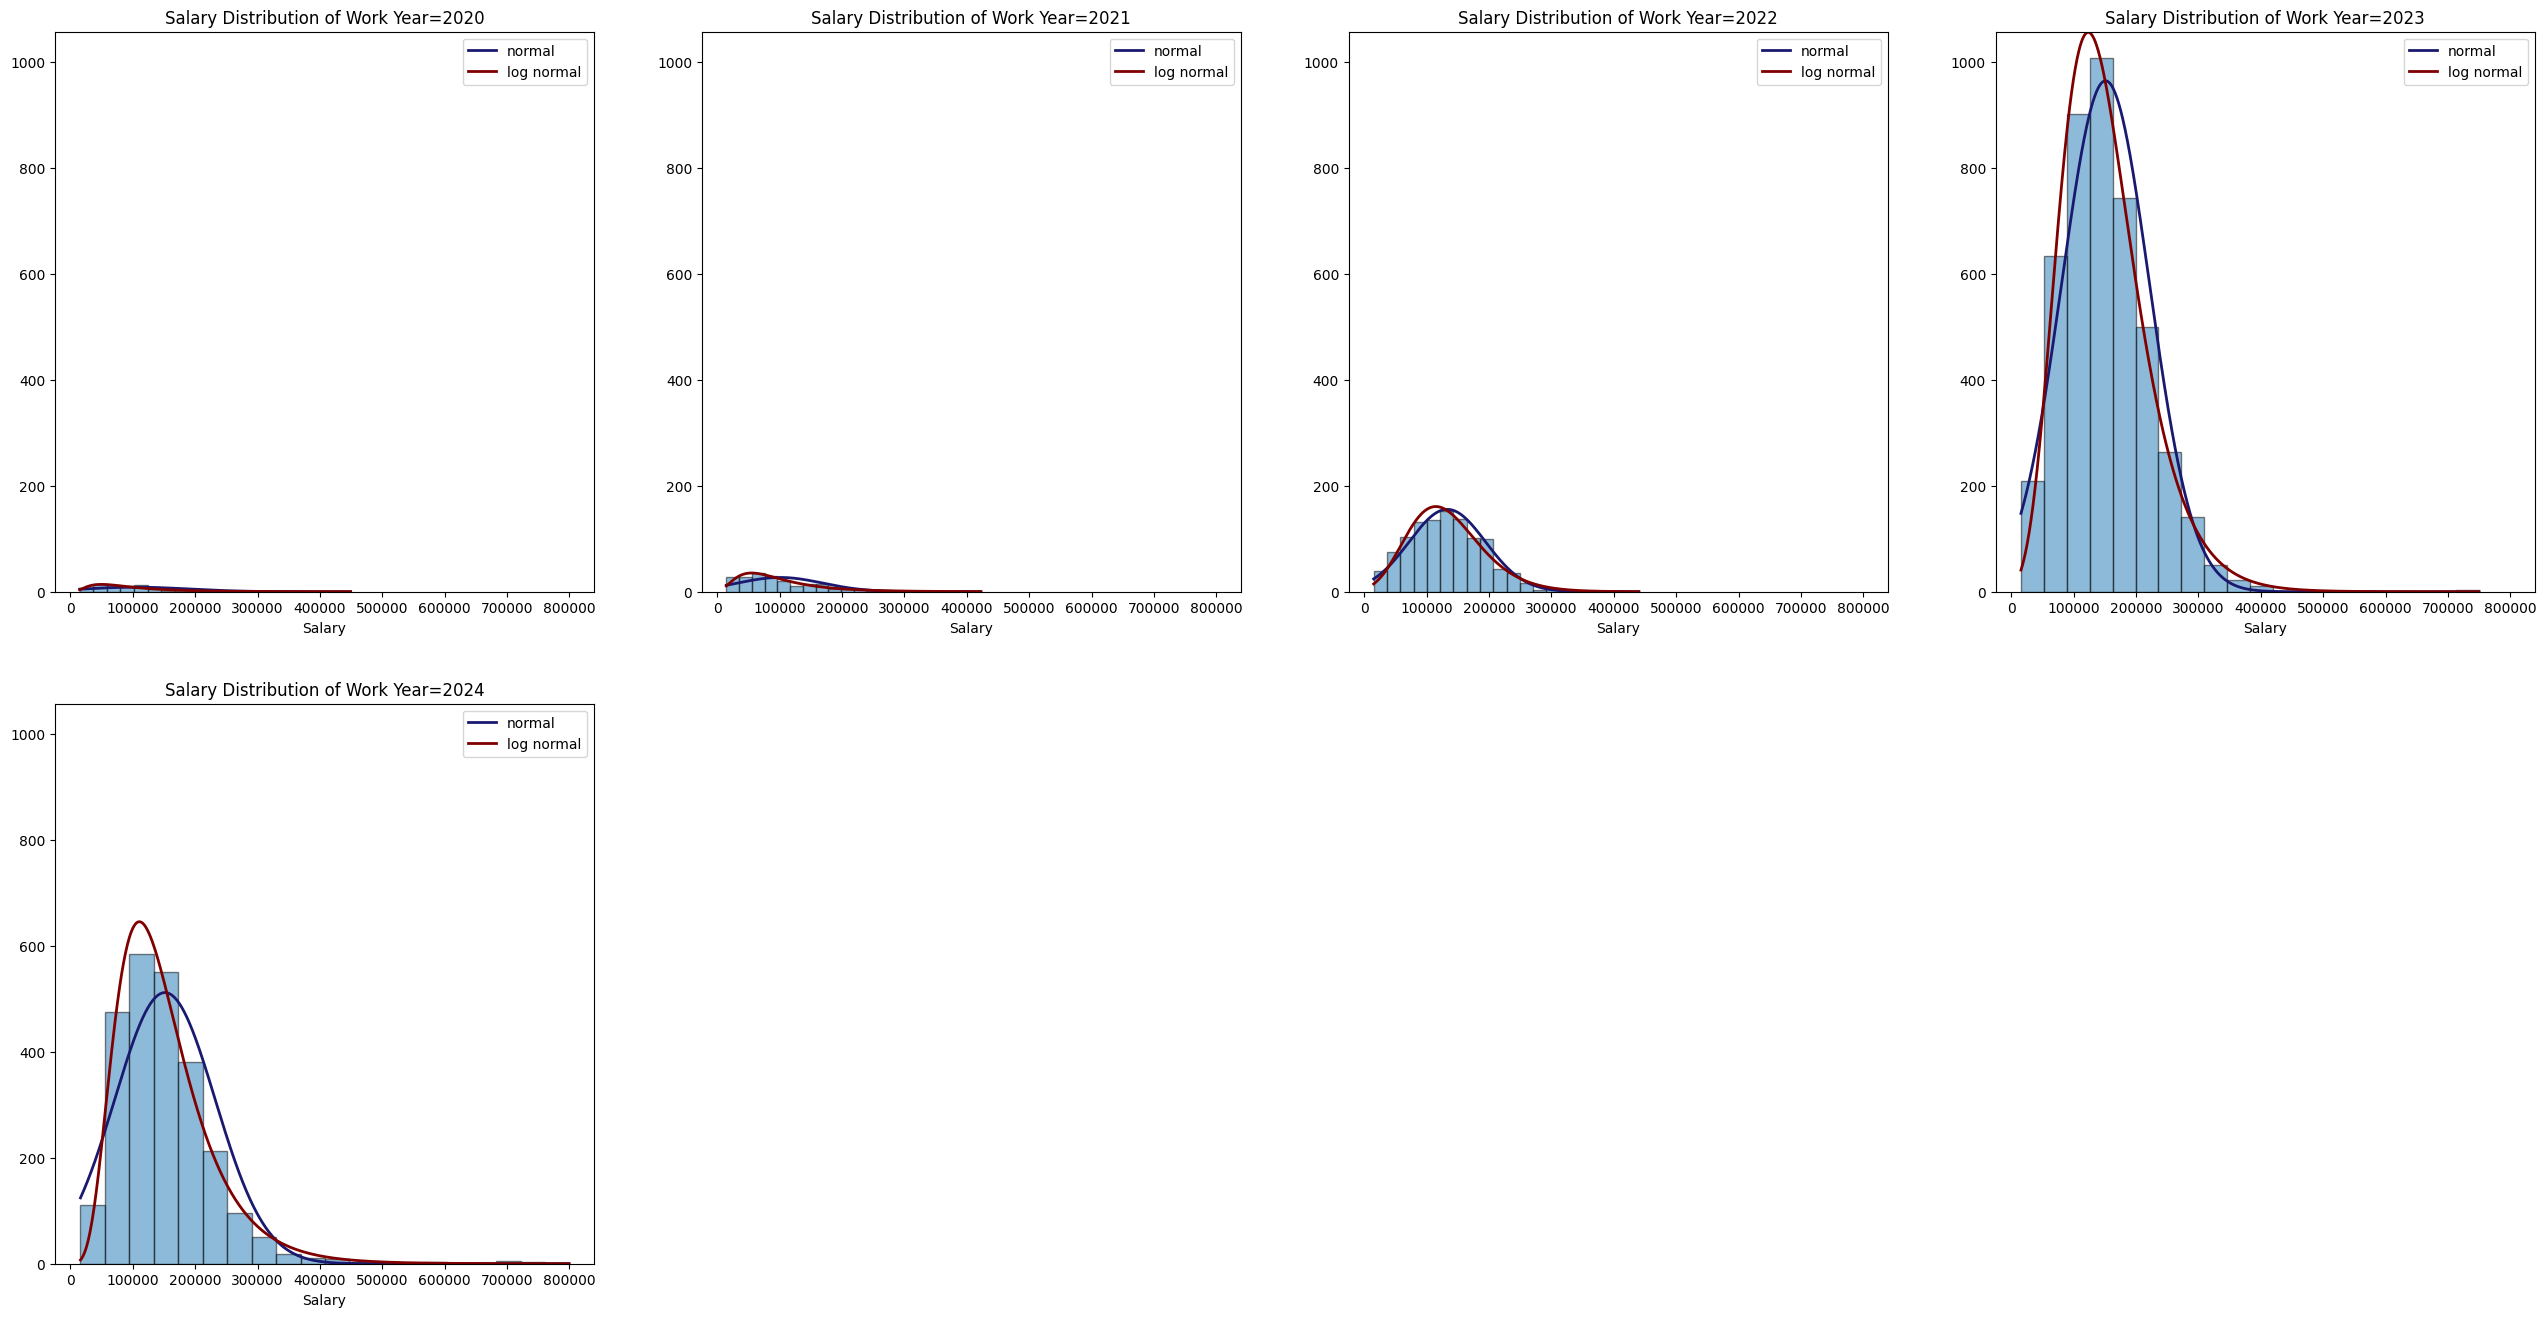

In [23]:
do_histograms(finalized_df, grouping_column='Work_Year', n_bins=n_bins, n_cols=n_cols)

### Violin Plots

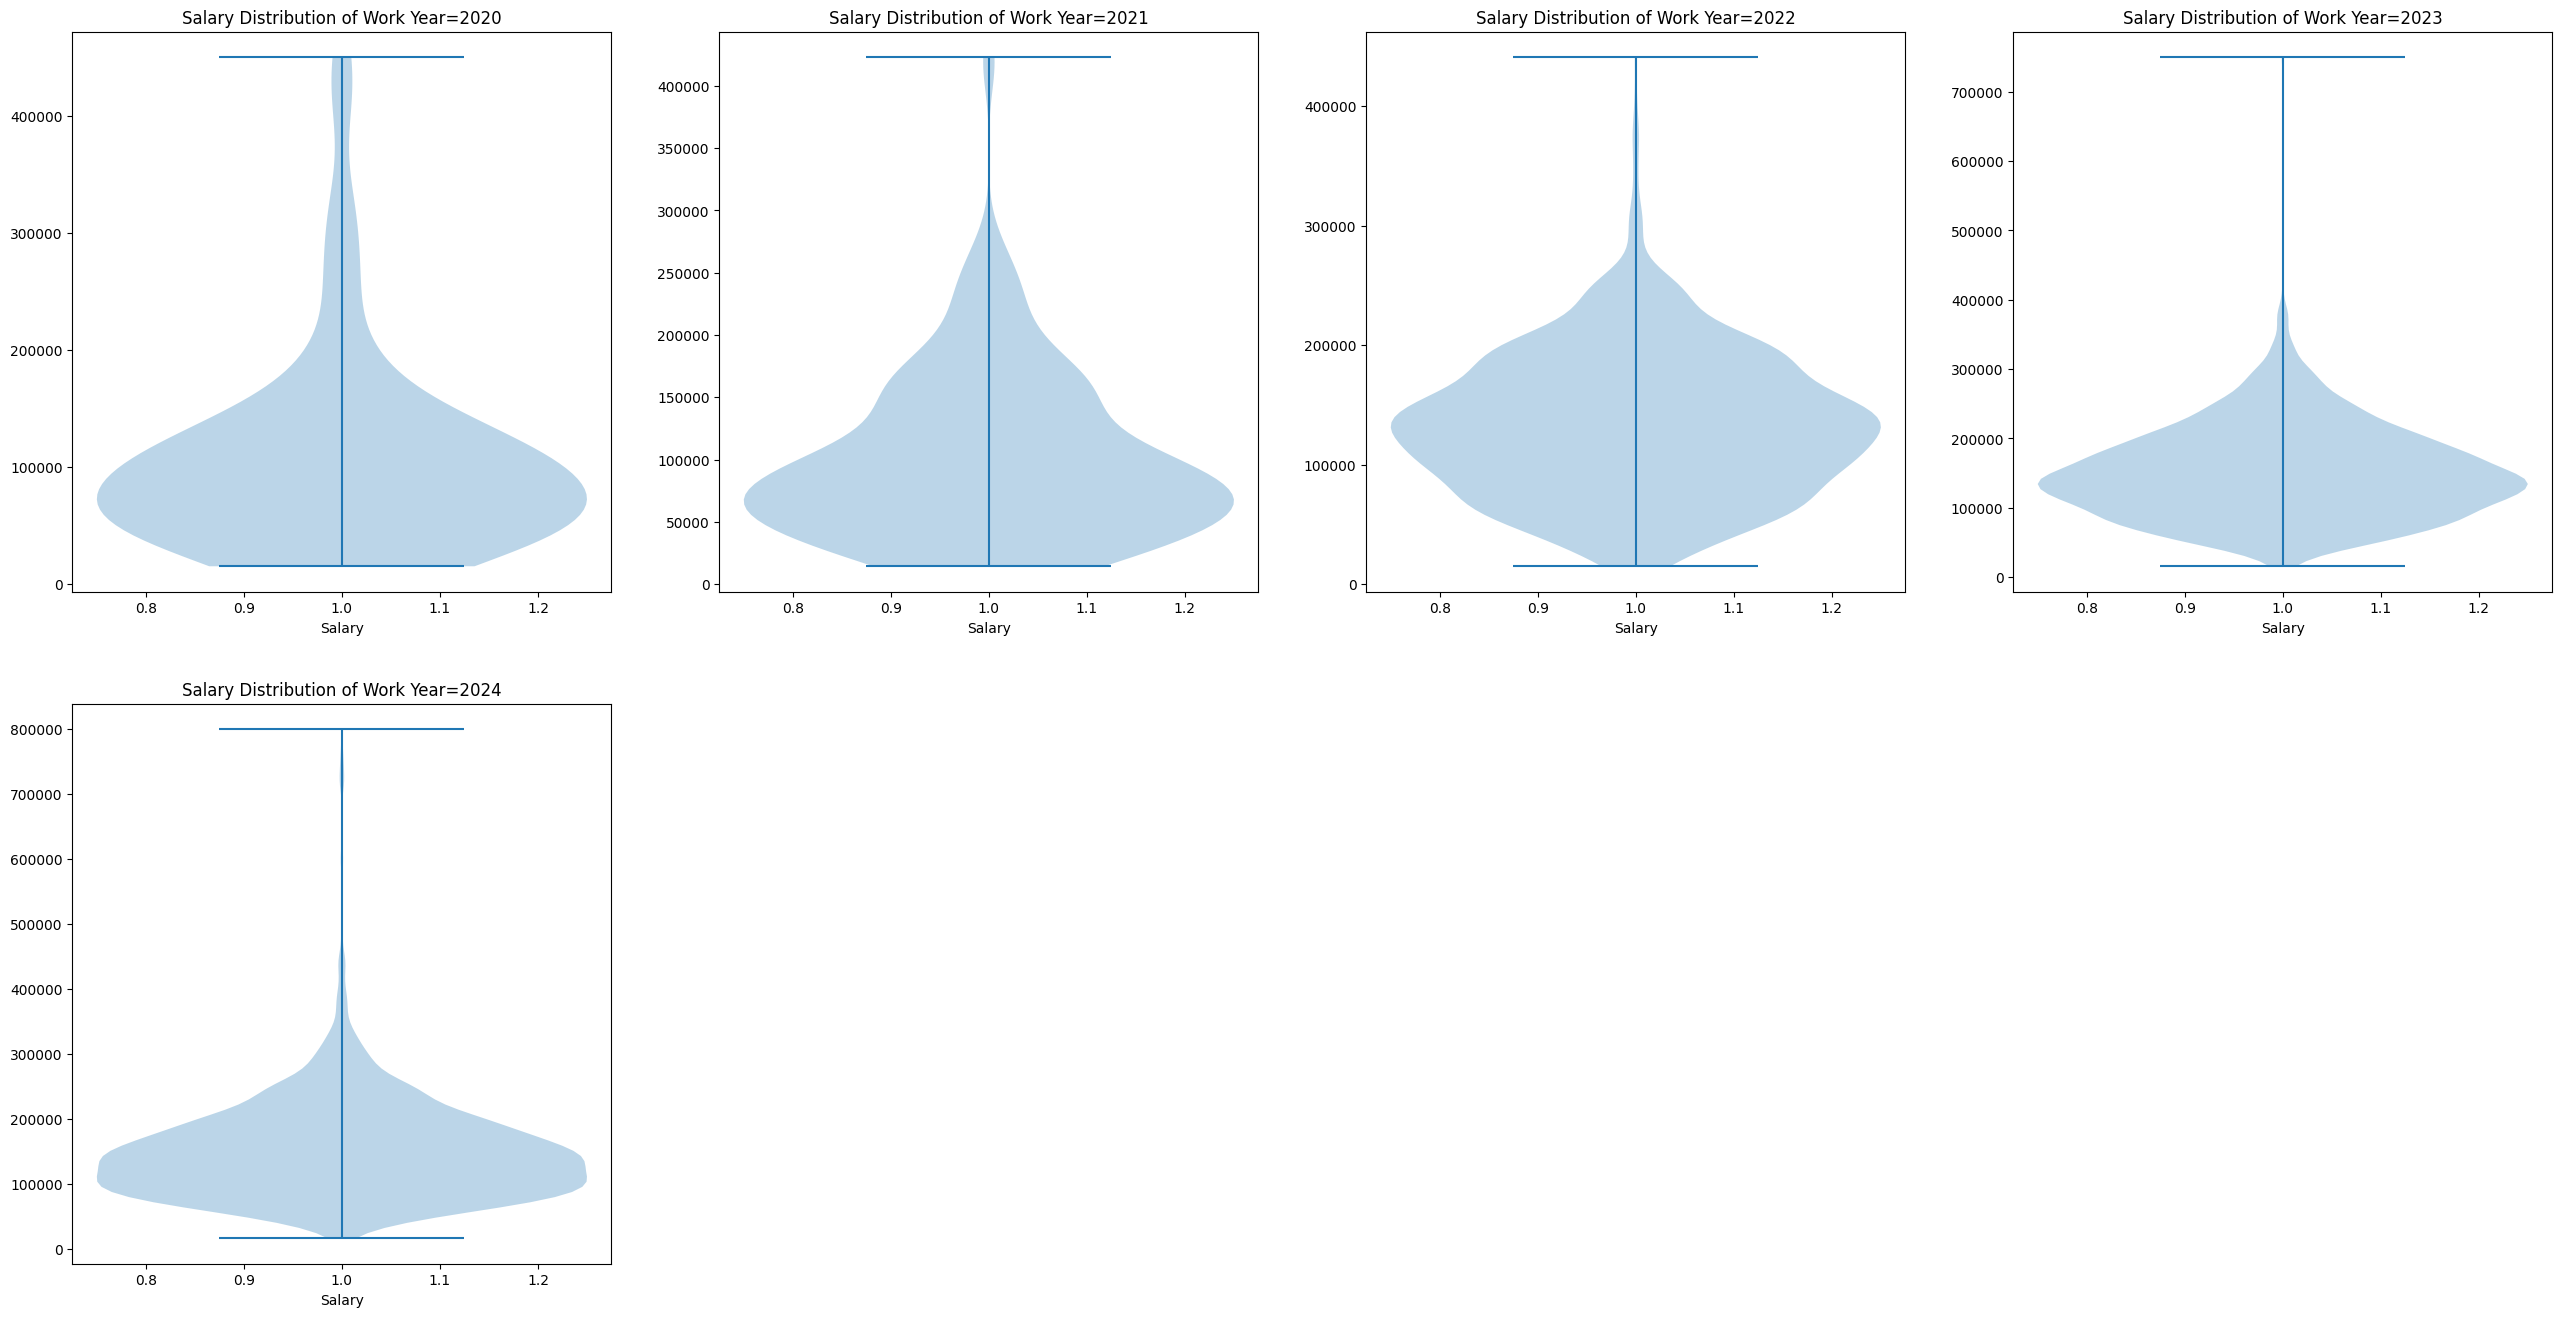

In [24]:
do_violin_plots(finalized_df, grouping_column='Work_Year', n_cols=n_cols)

#### Quantile Plot

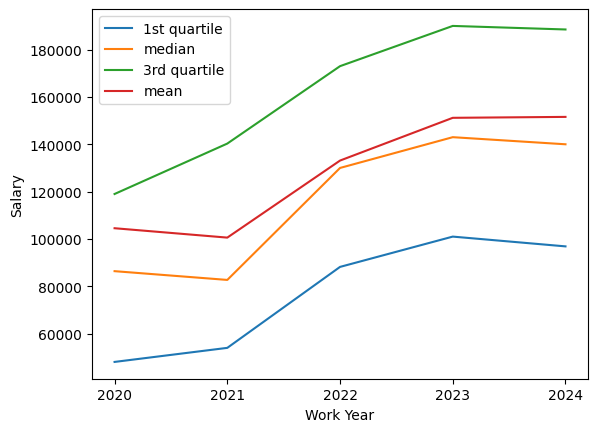

In [25]:
do_quantile_plot(finalized_df, grouping_column='Work_Year')

Based on these graphs, the salary of computer scientists had an increase from 2021 to 2023. However, in 2024, the salary of employees has been decreased for by a little margin. 

### Analysis of Employment Type

#### Histograms

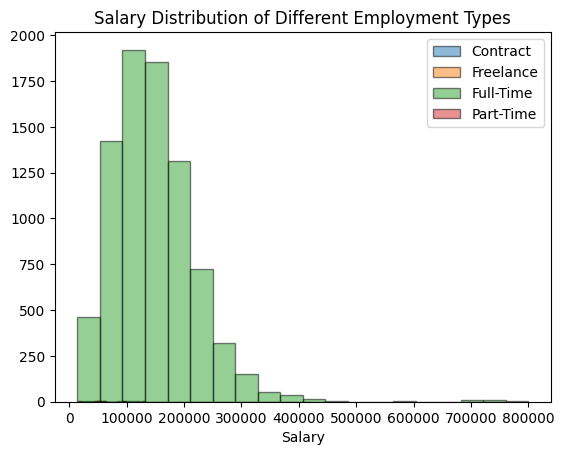

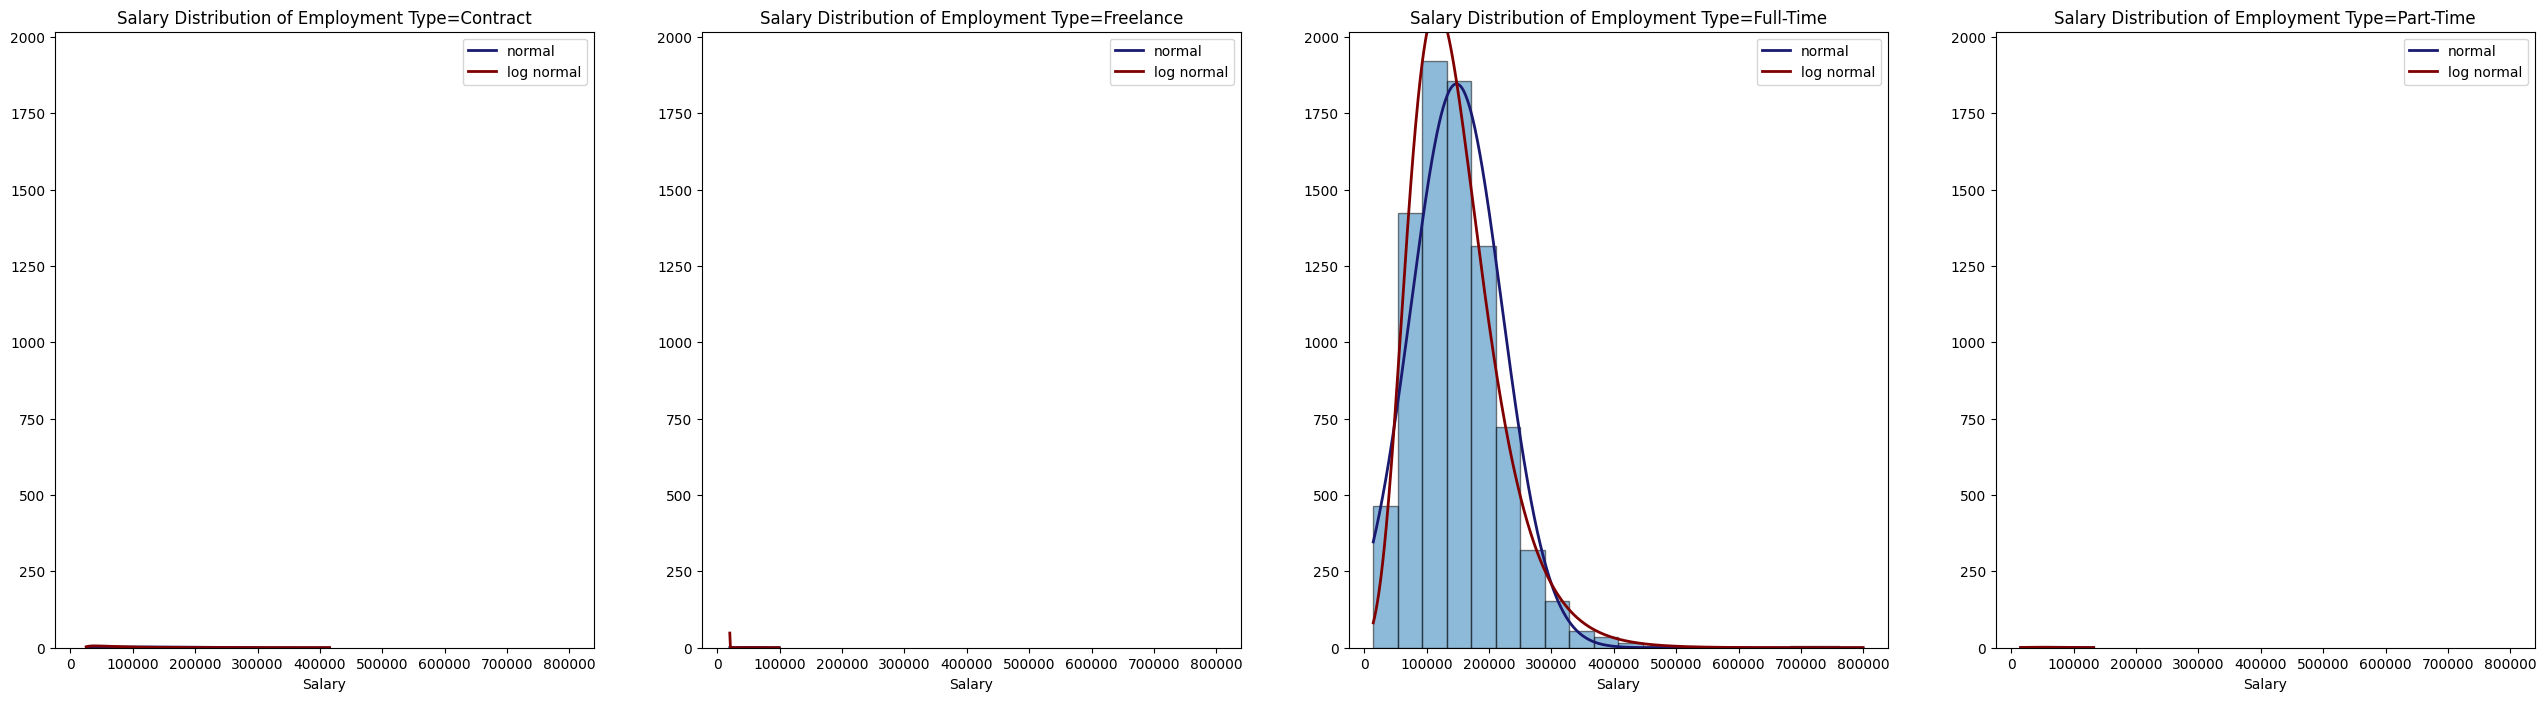

In [27]:
do_histograms(finalized_df, grouping_column='Employment_Type', n_bins=n_bins, n_cols=n_cols)

#### Violin Plots

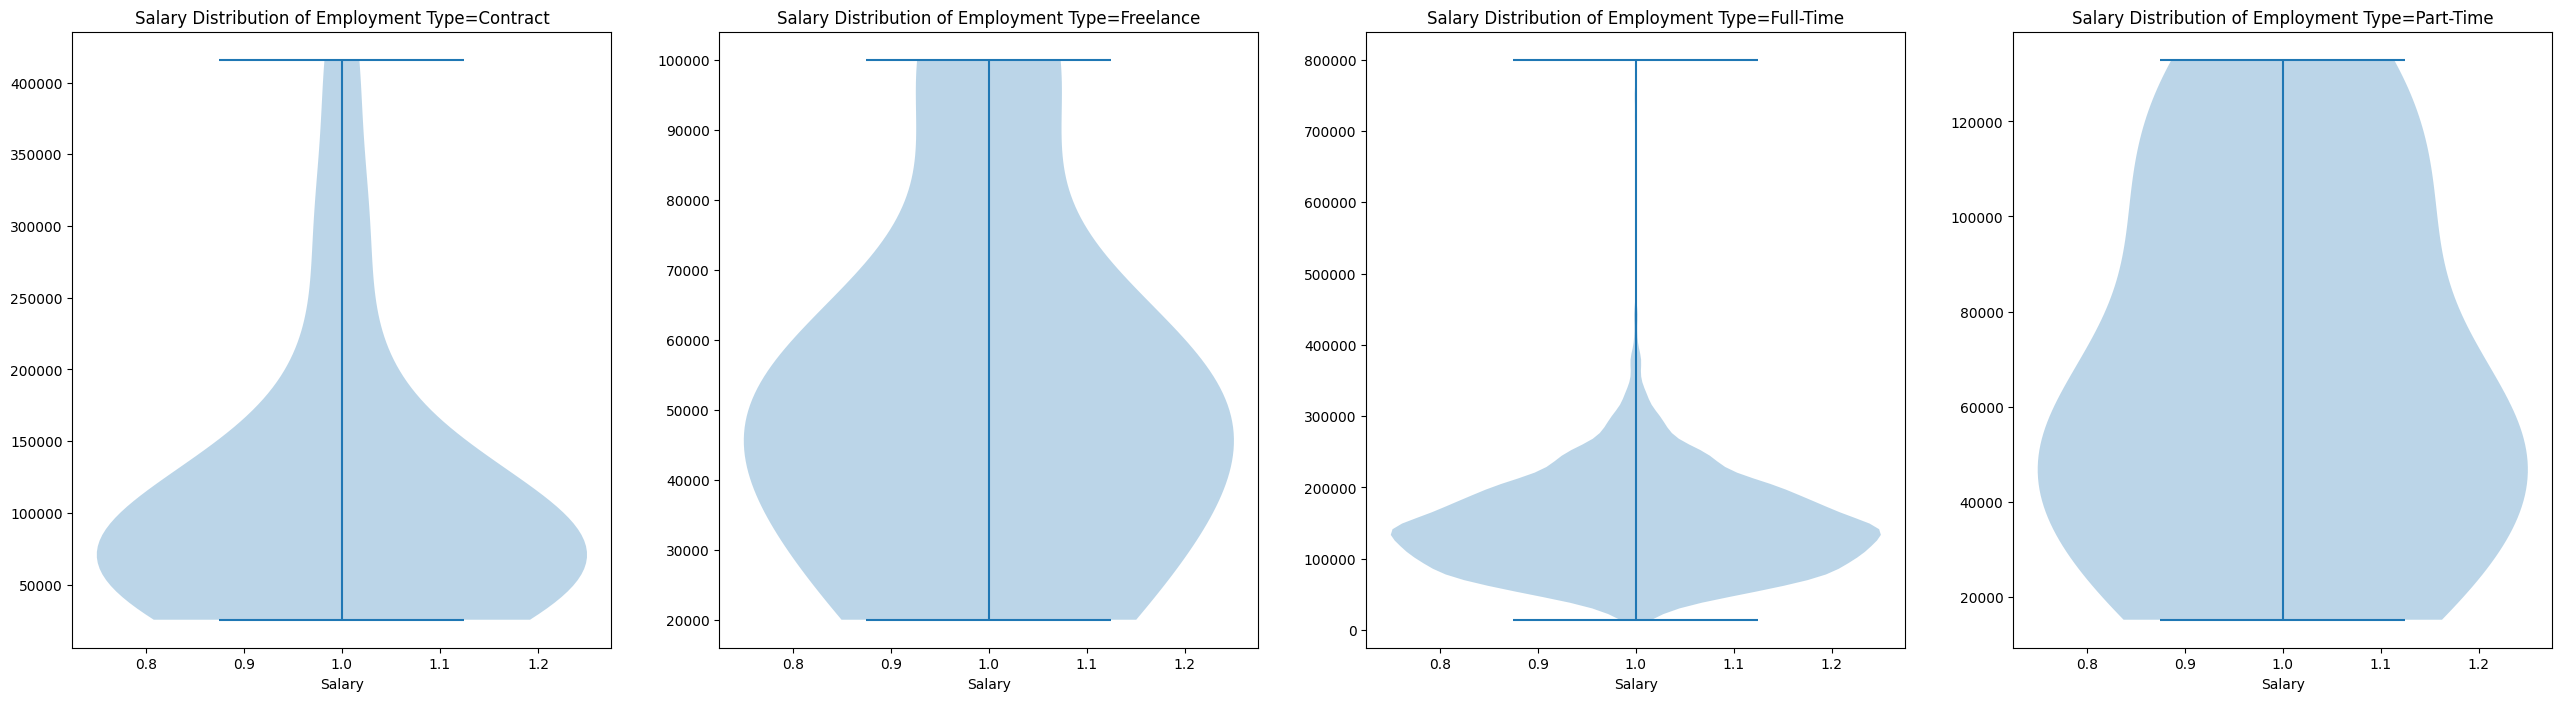

In [28]:
do_violin_plots(finalized_df, grouping_column='Employment_Type', n_cols=n_cols)

#### Quantile Plot

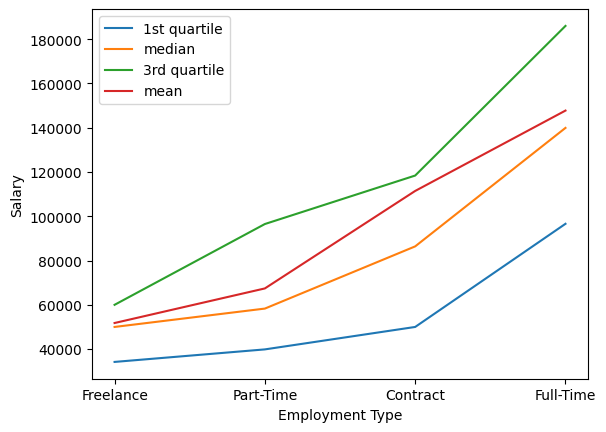

In [30]:
do_quantile_plot(finalized_df, grouping_column='Employment_Type', ordered_values=np.array(['Freelance', 'Part-Time', 'Contract', 'Full-Time']))

As it is shown, employers seem to be eager to pay full-time employees more than others.
Another interesting point is about violin plots. They indicate that other employment types does not possess a common mode and their salary's distribution does not replicate normal distribution.

### Analysis of Company Size

#### Histograms

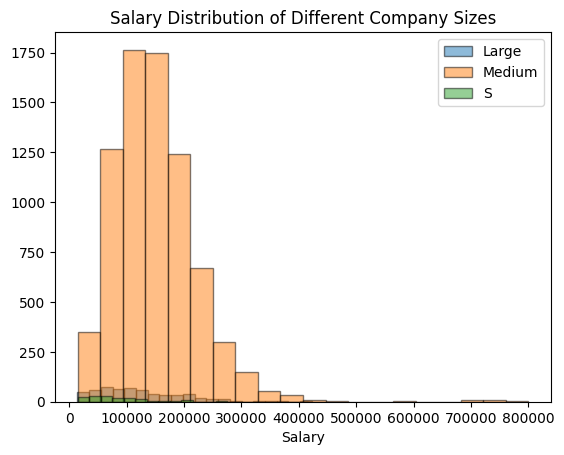

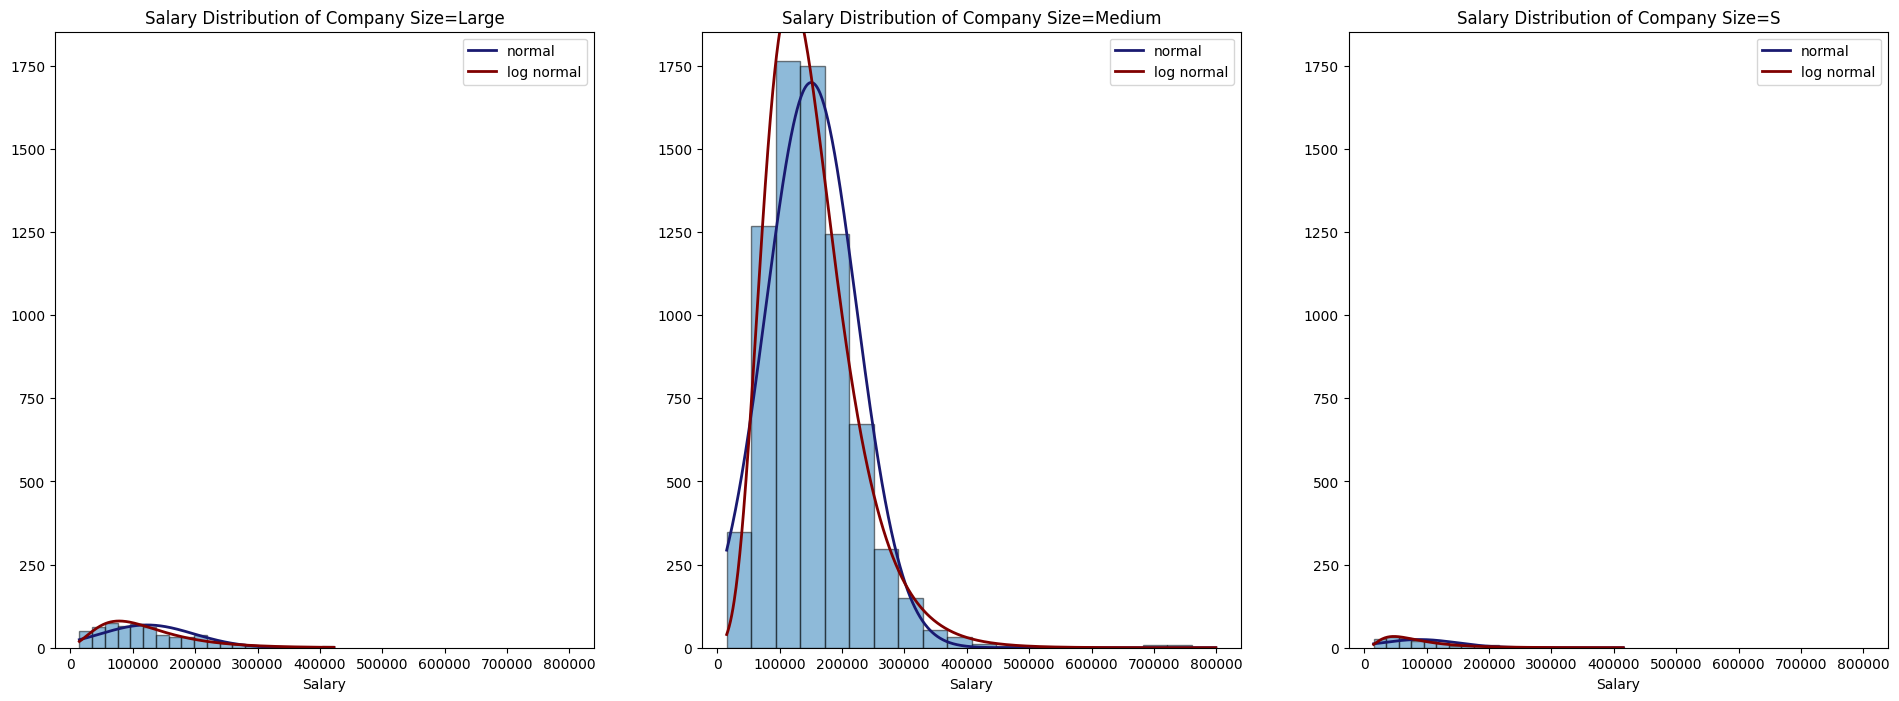

In [31]:
do_histograms(finalized_df, grouping_column='Company_Size', n_bins=n_bins, n_cols=n_cols)

#### Violin Plots

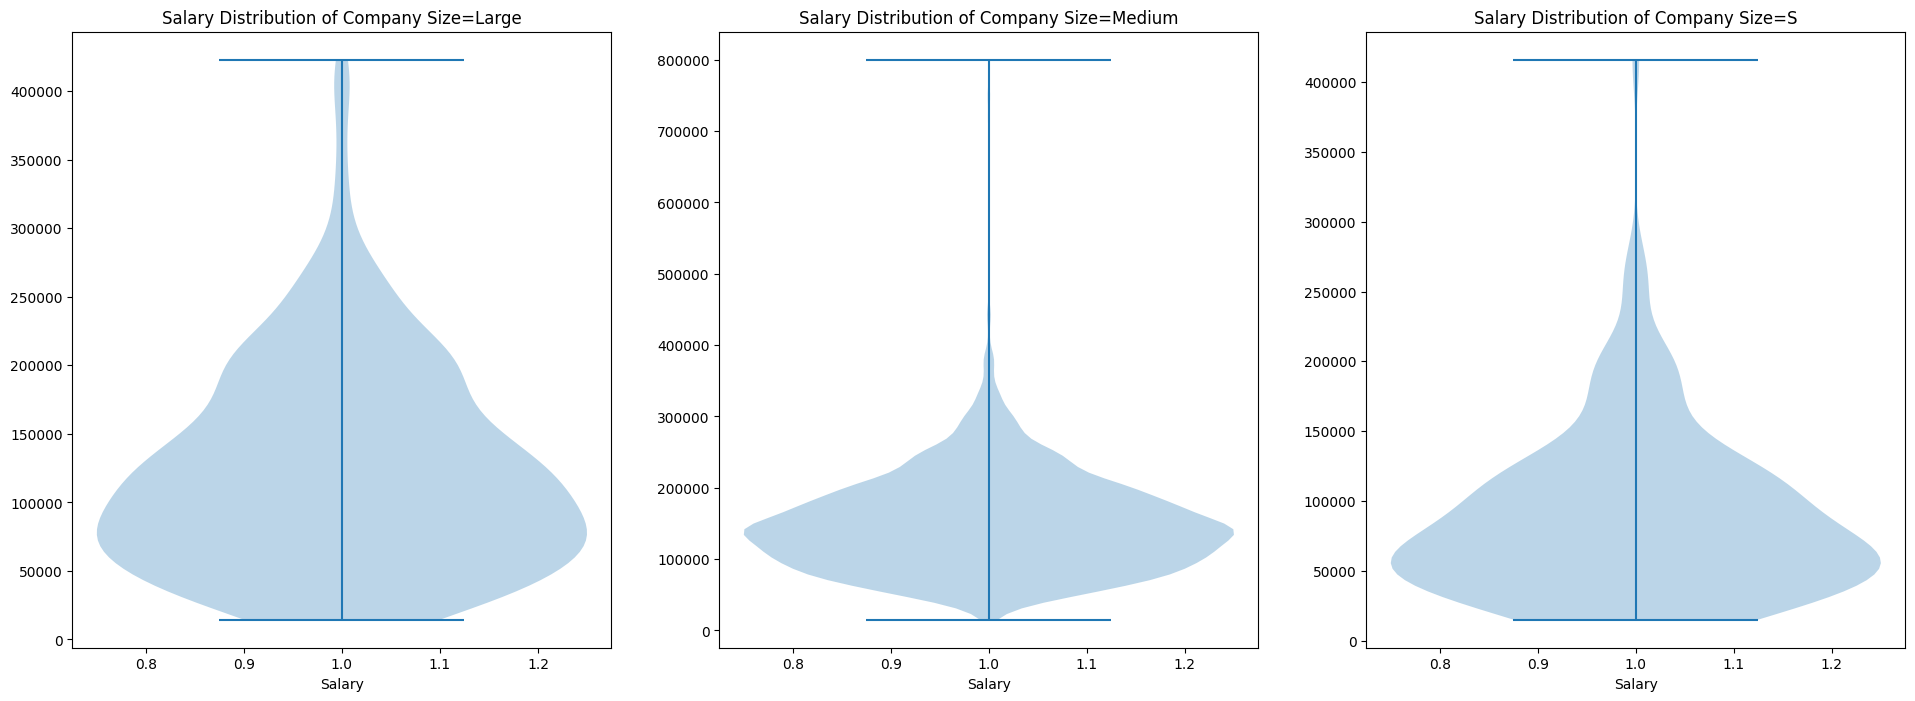

In [32]:
do_violin_plots(finalized_df, grouping_column='Company_Size', n_cols=n_cols)

#### Quantile Plot

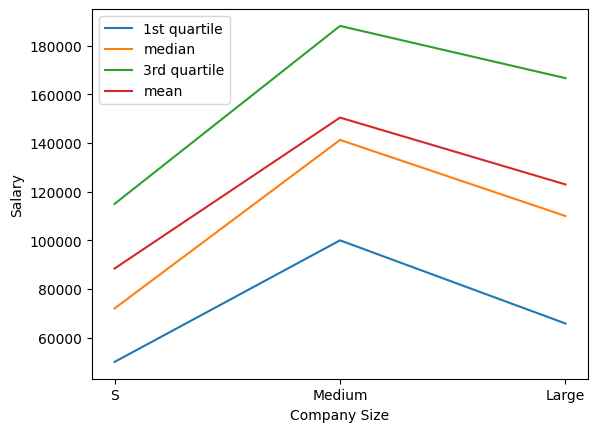

In [33]:
do_quantile_plot(finalized_df, grouping_column='Company_Size', ordered_values=np.array(['S', 'Medium', 'Large']))

### Analysis of Remote Ratios

#### Histograms

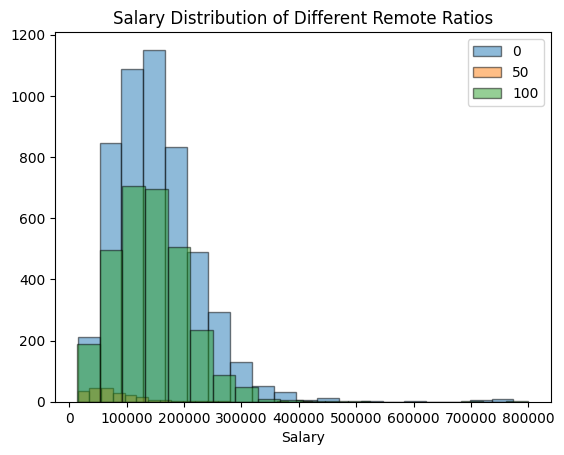

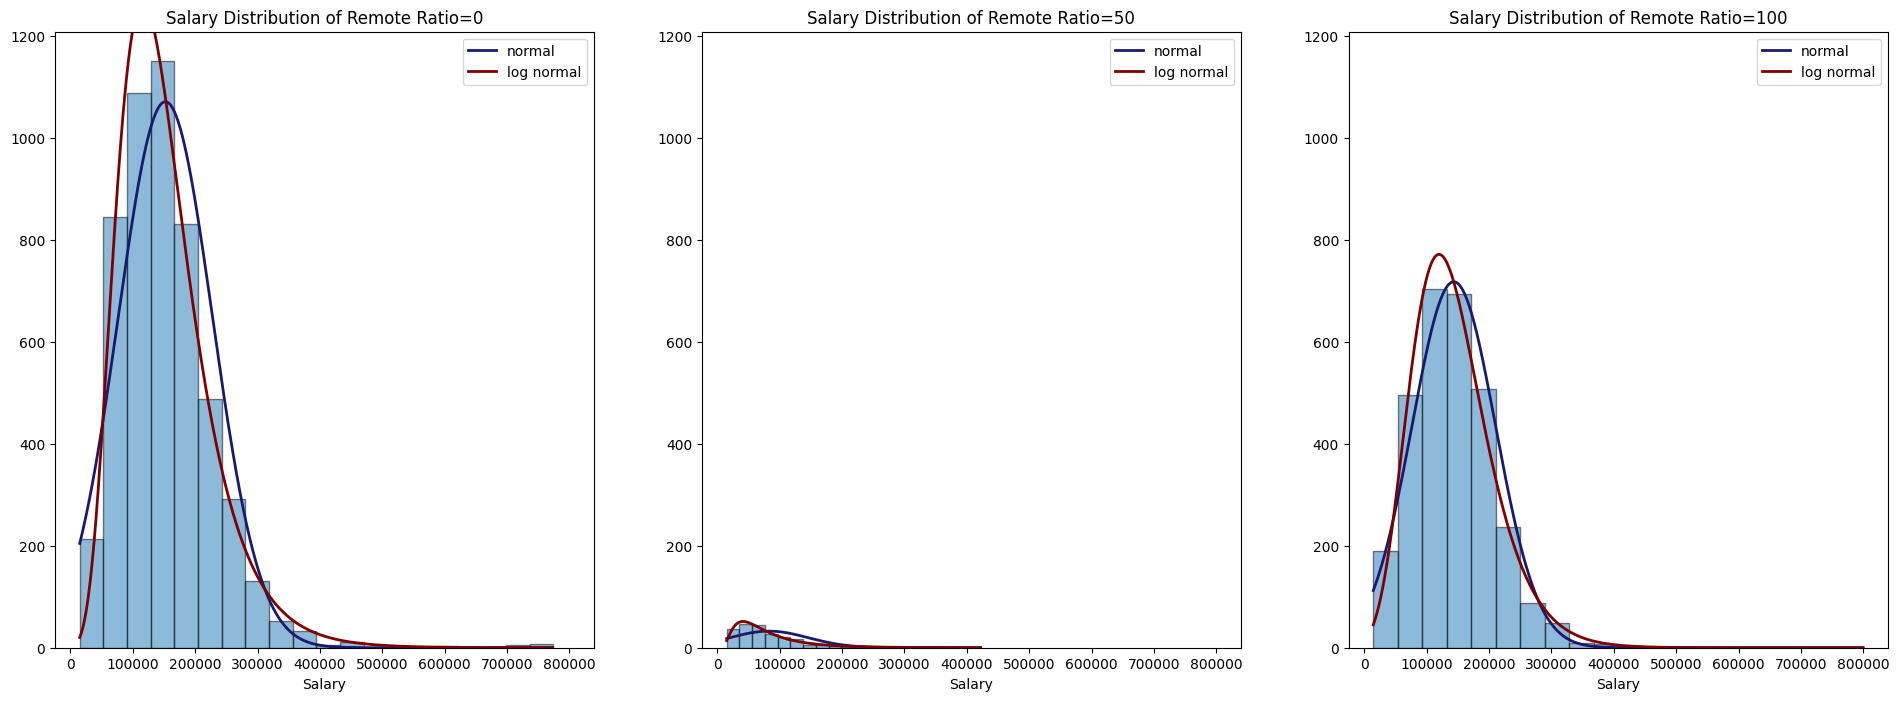

In [34]:
do_histograms(finalized_df, grouping_column='Remote_Ratio', n_bins=n_bins, n_cols=n_cols)

#### Violin Plots

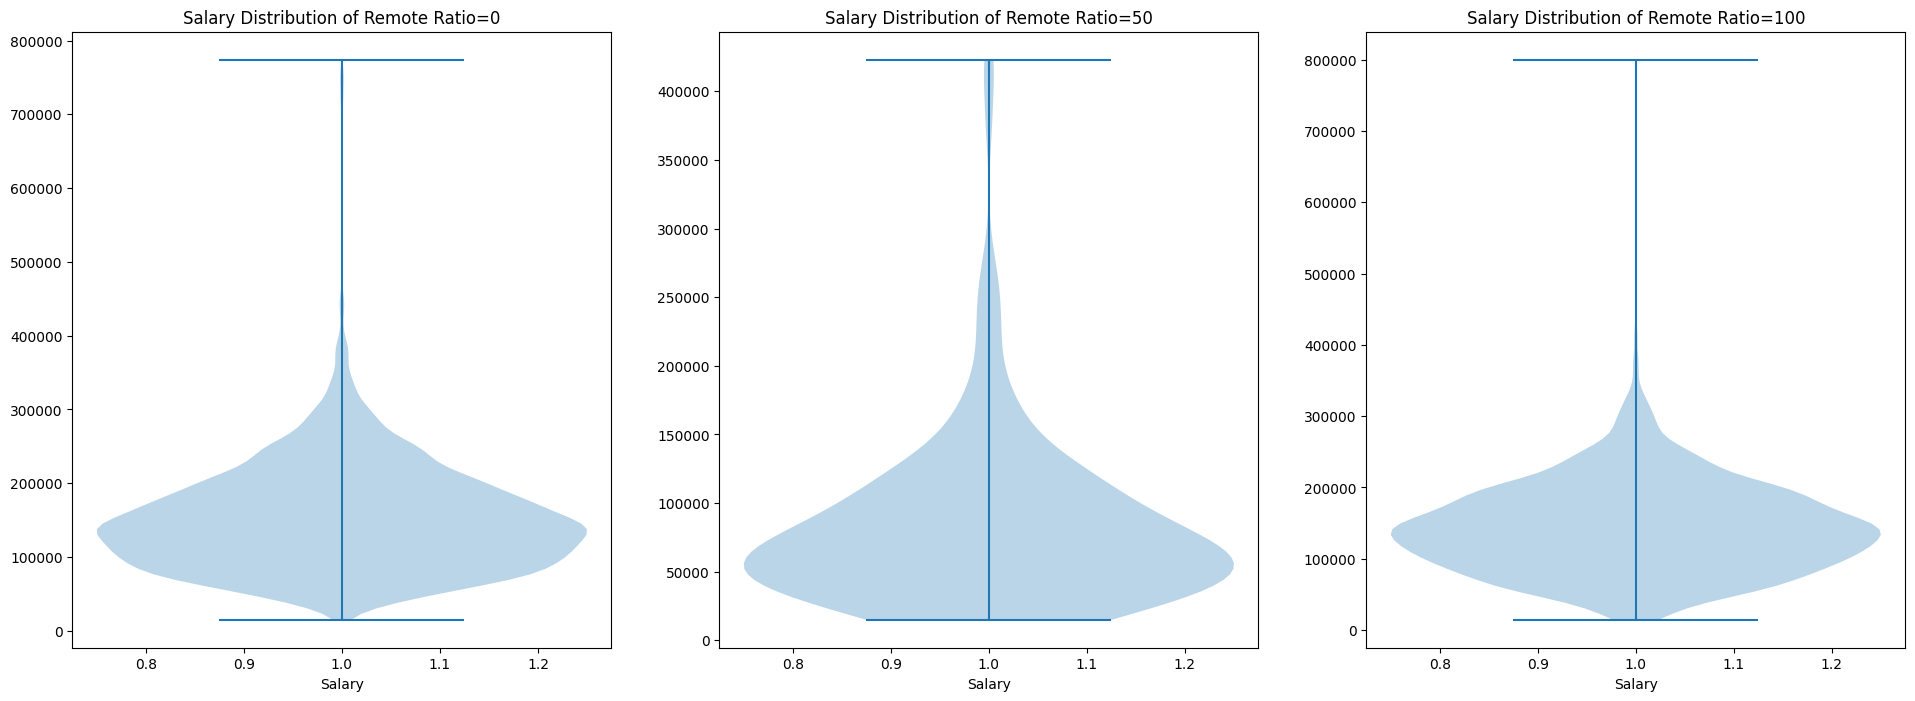

In [35]:
do_violin_plots(finalized_df, grouping_column='Remote_Ratio', n_cols=n_cols)

#### Quantile Plot

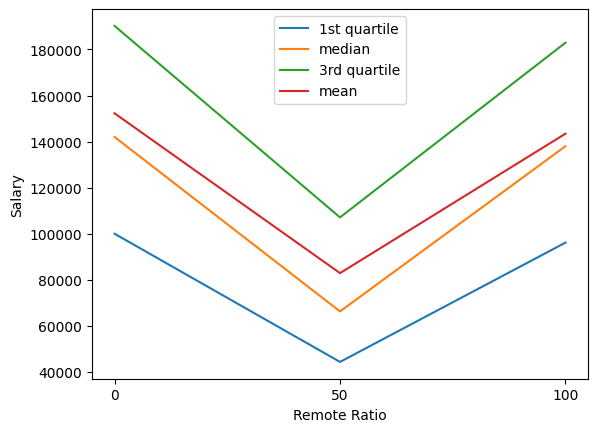

In [36]:
do_quantile_plot(finalized_df, grouping_column='Remote_Ratio')

The provided plots represent the distribution of salaries by employment type: Freelance, Part-Time, Contract, and Full-Time. From the data visualizations, we can infer the following:

1. **Line Plot**:
    - The line plot shows a clear trend where median, 3rd quantile, and mean salaries increase from Freelance to Full-Time employment.
    - The mean salary is consistently above the median, which may indicate a right-skewed distribution in each employment type, where a number of high salaries are pulling the mean up.
    - The difference between the 1st quantile and the median (and between the median and the 3rd quantile) is greater in Full-Time employment compared to other types, suggesting a wider spread of salaries.

2. **Violin Plots**:
    - The violin plots for Part-Time, Full-Time, and Contract work show the probability density of the salaries. They all peak around a salary of 1.0 on the normalized scale, indicating the most common salary level.
    - The violin plot for Full-Time employment is wider than for Part-Time and Contract, suggesting a wider range of salaries in Full-Time roles.
    - All employment types show a symmetrical distribution around the mode, which could indicate that for these employment types, there are as many salaries below the mode as above.

3. **Histograms**:
    - The histograms for Part-Time, Full-Time, and Contract roles show the frequency of salaries within certain ranges.
    - For Part-Time and Contract roles, the histograms appear fairly symmetrical with a central peak, suggesting that most salaries cluster around a median value.
    - The Full-Time histogram shows a right-skewed distribution, with a high frequency of salaries at lower ranges and a long tail towards higher salaries.
    - It's notable that the Full-Time histogram has more bars at higher salary ranges compared to Part-Time and Contract, implying that Full-Time roles may offer a chance for higher salaries.

4. **Combined Histogram**:
    - This histogram compares the salary distributions across different employment types directly.
    - It confirms that Full-Time employment offers higher salaries more frequently than Part-Time or Contract roles.
    - Part-Time and Contract roles seem to have a similar distribution and frequency of salaries, although Contract roles may have slightly more salaries in the higher ranges.

In summary, Full-Time employment appears to offer higher salaries and a greater range of salaries compared to Part-Time and Contract work. Freelance roles are not directly compared in the histograms but are likely to have a different pattern of salary distribution given the nature of freelance work. The violin plots indicate that the salary distributions for Part-Time, Full-Time, and Contract roles have a common mode, but Full-Time roles tend to have a wider spread and higher salary potential.

Overall, we have few large and small organizations, and a definite and accurate conclusion cannot be drawn with a small number of data, but generally, these can be said:

The uploaded images include several types of plots representing the distribution of salaries across different company sizes: small (S), medium, and large. Let's summarize the insights from these plots:

1. **Line Plot**:
    - This plot shows the 1st quantile, median, 3rd quantile, and mean salaries for each company size category.
    - There is an overall trend of increasing salary with increasing company size, especially notable in the mean and 3rd quantile salaries.
    - The 1st quantile for small companies is notably lower than for medium and large companies.
    - Mean salary tends to be higher than the median, which might indicate a right-skewed distribution, with some very high salaries pushing the mean up.

2. **Violin Plots**:
    - These plots provide a visual summary of the salary distributions, indicating the probability density at different salary levels for each company size.
    - All three company sizes show peak densities around the same salary value, which could be around the normalized value of 1.0 on the x-axis.
    - The width of the plots suggests that large companies have a wider range of salaries, indicating more variance.
    - The thinner "necks" of the plots at the top and bottom indicate fewer salaries at the extreme ends of the distribution for each company size.

3. **Histograms**:
    - These show the frequency of salary ranges for each company size.
    - For small and medium-sized companies, there is a clear peak suggesting that most salaries are around a central range.
    - Large companies appear to have a more uniform distribution, with salaries more evenly spread across different ranges.
    - The histogram for large companies does not show as clear of a peak as in small and medium-sized companies, which supports the notion of a wider range and variance in salaries.

4. **Combined Histogram**:
    - This histogram overlays the salary distributions for all three company sizes, allowing for direct comparison.
    - It’s clear that small companies tend to have fewer high salaries (as seen in the right tail of the distribution).
    - Large companies have a broader distribution of salaries, including more higher salaries.

From these plots, we can infer that larger companies not only offer higher salaries on average but also have a greater diversity in the range of salaries offered. Small companies, on the other hand, tend to offer lower salaries and have less variance in the salaries they offer.